In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Setting path and importing libraries.
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# Update this with your actual Google Drive path
base_dir = '/content/drive/MyDrive/wheat_4d/split_data'

train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')


In [ ]:
# The 5 class folders inside each split.
import os

for folder in ['Train', 'Validation', 'Test']:
    path = os.path.join(base_dir, folder)
    print(f"\nContents of {folder}: {os.listdir(path)}")



Contents of Train: ['WheatBlast', 'HealthyLeaf', 'LeafBlight', 'FusariumFootRot', 'BlackPoint']

Contents of Validation: ['WheatBlast', 'LeafBlight', 'HealthyLeaf', 'BlackPoint', 'FusariumFootRot']

Contents of Test: ['HealthyLeaf', 'BlackPoint', 'LeafBlight', 'FusariumFootRot', 'WheatBlast']


In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=mobilenet_preprocess,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    fill_mode='nearest'
)


In [ ]:
#data preprosessing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(preprocessing_function=mobilenet_preprocess)
val_gen = ImageDataGenerator(preprocessing_function=mobilenet_preprocess)
test_gen = ImageDataGenerator(preprocessing_function=mobilenet_preprocess)

train_data = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_data = val_gen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_data = test_gen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)


Found 3500 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
# CNN model
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=5):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
# compile and train CNN model
cnn_model = build_custom_cnn()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.5331 - loss: 1.2920 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 2841s 26s/step - accuracy: 0.5347 - loss: 1.2878 - val_accuracy: 0.8990 - val_loss: 0.2643
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.9089 - loss: 0.2780 - val_accuracy: 0.9660 - val_loss: 0.1138
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 453s 4s/step - accuracy: 0.9471 - loss: 0.1505 - val_accuracy: 0.9720 - val_loss: 0.1077
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.9631 - loss: 0.1113 - val_accuracy: 0.9840 - val_loss: 0.0649
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.9716 - loss: 0.0840 - val_accuracy: 0.9800 - val_loss: 0.0663
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.9808 - loss: 0.0669 - val_accuracy: 0.9870 - val_loss: 0.0548
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.9830 - loss: 0.0507 - val_accuracy: 0.9860 - val_loss: 0.0538
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step - accuracy: 0.9831 - loss: 0.0528 - val_accuracy: 0.9

In [ ]:
# MobileNet Model
def build_mobilenet_model(input_shape=(224, 224, 3), num_classes=5):
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze base

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

mobilenet_model = build_mobilenet_model()
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mobilenet = mobilenet_model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.7857 - loss: 0.5985 - val_accuracy: 0.9860 - val_loss: 0.0486
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9838 - loss: 0.0537 - val_accuracy: 0.9930 - val_loss: 0.0228
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9917 - loss: 0.0295 - val_accuracy: 0.9920 - val_loss: 0.0215
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9885 - loss: 0.0325 - val_accuracy: 0.9920 - val_loss: 0.0142
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9979 - loss: 0.0102 - val_accuracy: 0.9970 - val_loss: 0.0090
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.9970 - val_loss: 0.0063
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9978 - loss: 0.0088 - val_accuracy: 0.9970 - val_loss: 0.0095
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9991 - loss: 0.0053 - val_accu

In [ ]:
"""
# ResNet50 Model
def build_resnet_model(input_shape=(224, 224, 3), num_classes=5):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

resnet_model = build_resnet_model()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet = resnet_model.fit(train_data, validation_data=val_data, epochs=10)
"""


📊 Classification Report for CNN


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 258s 17s/step
                 precision    recall  f1-score   support

     BlackPoint       0.98      0.96      0.97       100
FusariumFootRot       0.97      1.00      0.99       100
    HealthyLeaf       0.96      0.96      0.96       100
     LeafBlight       1.00      1.00      1.00       100
     WheatBlast       1.00      0.99      0.99       100

       accuracy                           0.98       500
      macro avg       0.98      0.98      0.98       500
   weighted avg       0.98      0.98      0.98       500



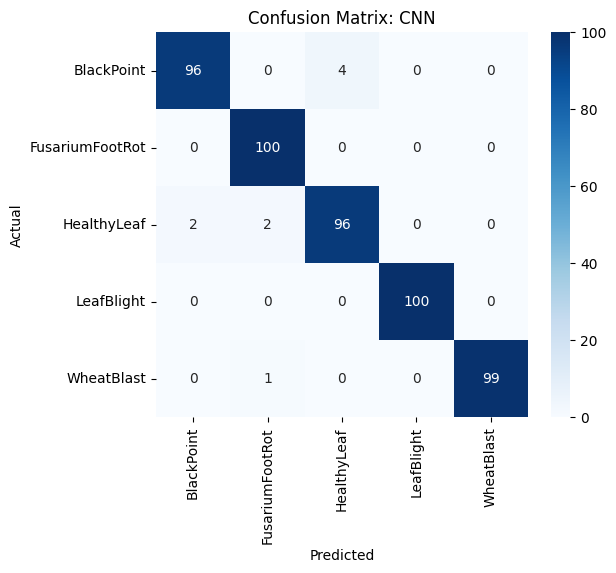

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(cnn_model, test_data, model_name="CNN_Model"):
    print(f"\n📊 Classification Report for {model_name}")

    # Predictions
    preds = cnn_model.predict(test_data)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_data.classes
    labels = list(test_data.class_indices.keys())

    # Report
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Return accuracy for plotting
    accuracy = np.mean(y_true == y_pred)
    return accuracy

acc_cnn = evaluate_model(cnn_model, test_data, model_name="CNN")



📊 Classification Report for MobileNetV2
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step
                 precision    recall  f1-score   support

     BlackPoint       1.00      0.98      0.99       100
FusariumFootRot       1.00      1.00      1.00       100
    HealthyLeaf       0.98      1.00      0.99       100
     LeafBlight       1.00      1.00      1.00       100
     WheatBlast       1.00      1.00      1.00       100

       accuracy                           1.00       500
      macro avg       1.00      1.00      1.00       500
   weighted avg       1.00      1.00      1.00       500



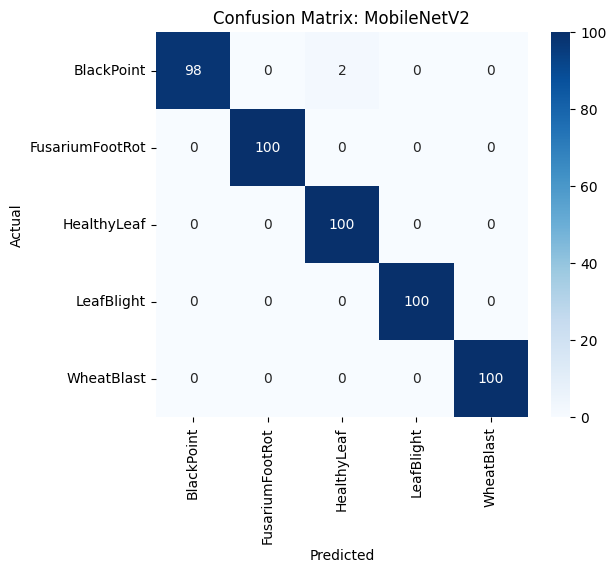

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(mobilenet_model, test_data, model_name="MobileNetV2"):
    print(f"\n📊 Classification Report for {model_name}")

    # Predictions
    preds = mobilenet_model.predict(test_data)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_data.classes
    labels = list(test_data.class_indices.keys())

    # Report
    print(classification_report(y_true, y_pred, target_names=labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Return accuracy for plotting
    accuracy = np.mean(y_true == y_pred)
    return accuracy

acc_mobilenet = evaluate_model(mobilenet_model, test_data, model_name="MobileNetV2")

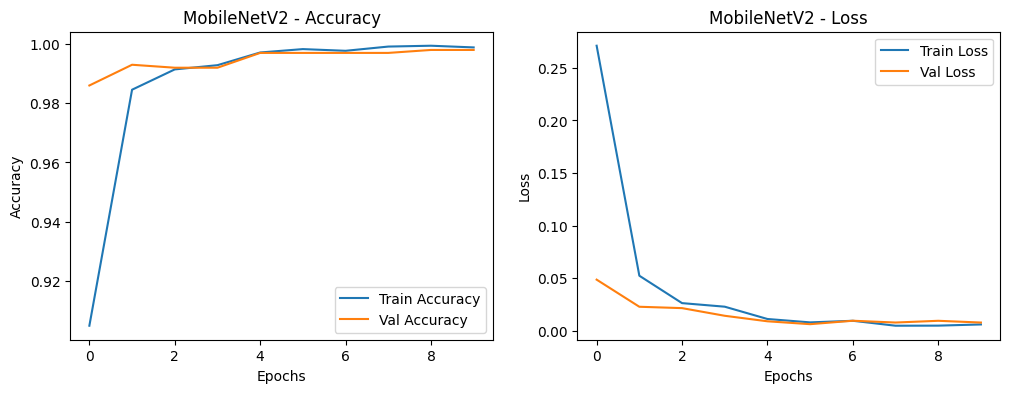

In [ ]:
def plot_training_history(history, model_name="Model"):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
plot_training_history(history_mobilenet, model_name="MobileNetV2")


In [ ]:
# Save CNN model
cnn_model.save('cnn_model.h5')

# Save MobileNetV2 model
mobilenet_model.save('mobilenetv2_model.h5')


In [ ]:
# Move to Google Drive
!cp cnn_model.h5 /content/drive/MyDrive/wheat_4d/
!cp mobilenetv2_model.h5 /content/drive/MyDrive/wheat_4d/


In [ ]:
"""
# to load model later!!
from tensorflow.keras.models import load_model

# Load CNN
cnn_model = load_model('cnn_model.h5')

# Load MobileNetV2
mobilenet_model = load_model('mobilenetv2_model.h5')
"""

"\n# to load model later!!\nfrom tensorflow.keras.models import load_model\n\n# Load CNN\ncnn_model = load_model('cnn_model.h5')\n\n# Load MobileNetV2\nmobilenet_model = load_model('mobilenetv2_model.h5')\n"

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Get class names
class_names = list(test_data.class_indices.keys())
n_classes = len(class_names)


In [ ]:
def plot_roc_auc(model, test_data, model_name="Model"):
    y_true = test_data.classes
    y_score = model.predict(test_data)

    # One-hot encode the true labels
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


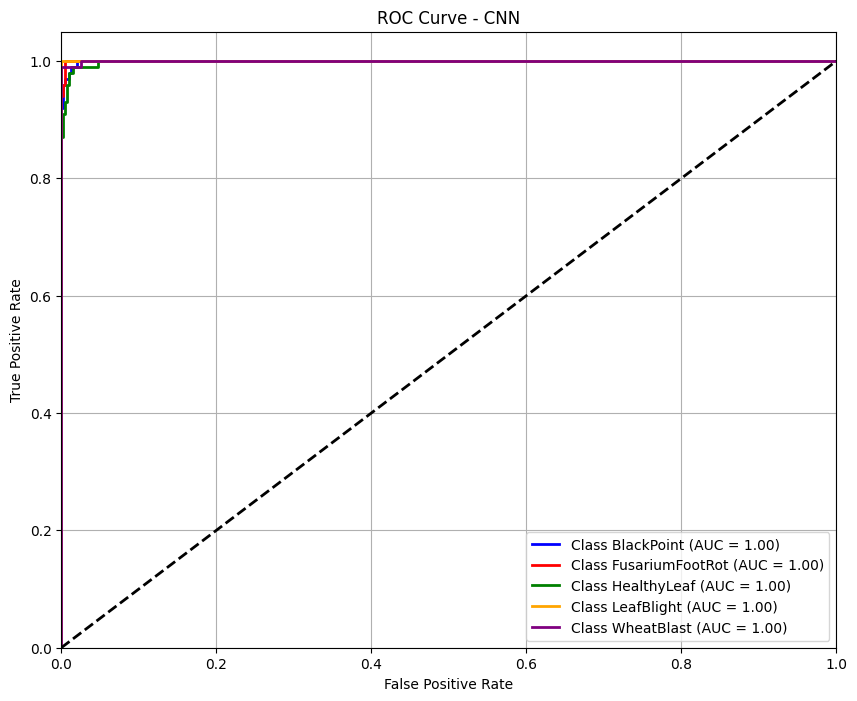

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


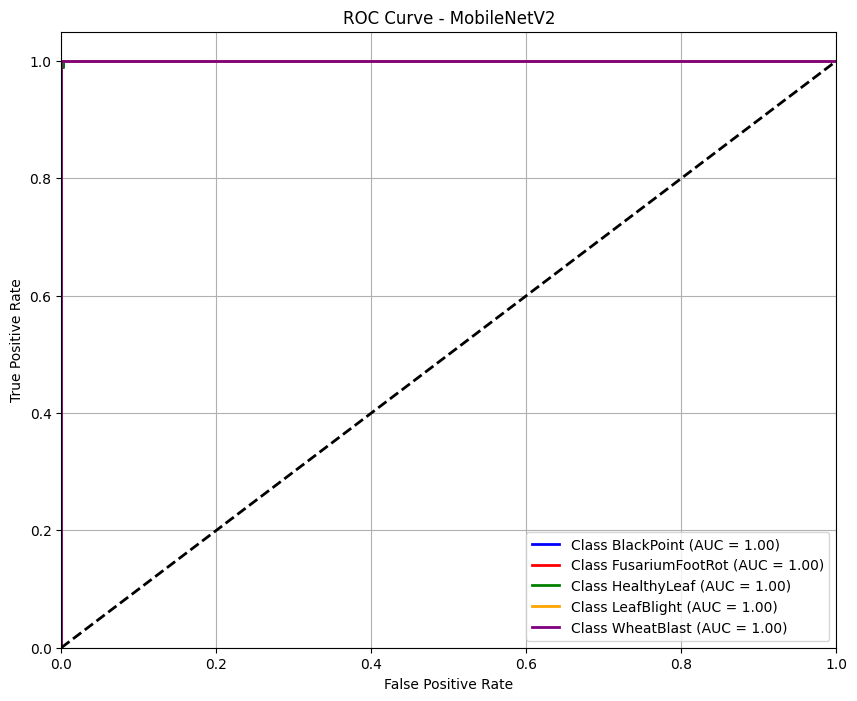

In [ ]:
# For CNN
plot_roc_auc(cnn_model, test_data, model_name="CNN")

# For MobileNetV2
plot_roc_auc(mobilenet_model, test_data, model_name="MobileNetV2")


# **EFFICIENTNETB0 + CBAM**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
folder_path = "/content/drive/MyDrive/wheat_4d/split_data"
print("Files in wheat folder:")
print(os.listdir(folder_path))

Files in wheat folder:
['Test', 'Train', 'Validation']


In [3]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image, UnidentifiedImageError
import os
import shutil

In [4]:
#Constants
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

#Dataset Paths
folder_path = "/content/drive/MyDrive/wheat_4d/split_data"
train_path = os.path.join(folder_path, "Train")
valid_path = os.path.join(folder_path, "Validation")
test_path = os.path.join(folder_path, "Test")

target_val_count=100


In [5]:
# loading dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 3500 files belonging to 5 classes.
Found 1000 files belonging to 5 classes.
Found 500 files belonging to 5 classes.


In [6]:
#Dataset Prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)

In [7]:
#Model Definition
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# CBAM Attention Block
class CBAMBlock(layers.Layer):
    def __init__(self, ratio=8, **kwargs):
        super(CBAMBlock, self).__init__(**kwargs)
        self.ratio = ratio

    def build(self, input_shape):
        channel = input_shape[-1]
        self.shared_dense_one = layers.Dense(channel // self.ratio, activation='relu')
        self.shared_dense_two = layers.Dense(channel)
        self.spatial_conv = layers.Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')

    def call(self, input_feature):
        avg_pool = tf.reduce_mean(input_feature, axis=[1, 2], keepdims=True)
        max_pool = tf.reduce_max(input_feature, axis=[1, 2], keepdims=True)

        avg_out = self.shared_dense_two(self.shared_dense_one(avg_pool))
        max_out = self.shared_dense_two(self.shared_dense_one(max_pool))
        channel_attention = tf.nn.sigmoid(avg_out + max_out)
        channel_refined = input_feature * channel_attention

        avg_spatial = tf.reduce_mean(channel_refined, axis=-1, keepdims=True)
        max_spatial = tf.reduce_max(channel_refined, axis=-1, keepdims=True)
        concat = tf.concat([avg_spatial, max_spatial], axis=-1)
        spatial_attention = self.spatial_conv(concat)
        return channel_refined * spatial_attention

In [9]:
base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Lambda(tf.keras.applications.efficientnet.preprocess_input)(inputs)
x = base_model(x, training=False)
x = CBAMBlock()(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
#len(class_names) == 5
outputs = layers.Dense(5, activation='softmax')(x) #REMEMBER TO CHANGE CLASS_NAME WHEN USING DIFFERENT DATASET (CAN CHANGE TO DYNAMIC)
model = tf.keras.Model(inputs, outputs)

In [10]:
#Compile Model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',       # or 'val_loss'
    patience=3,
    restore_best_weights=True
)

In [12]:
checkpoint_path = "/content/drive/MyDrive/model_checkpoint.weights.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [13]:
#Train Initial Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4631 - loss: 1.5176
Epoch 1: val_accuracy improved from -inf to 0.88700, saving model to /content/drive/MyDrive/model_checkpoint.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 638s 6s/step - accuracy: 0.4650 - loss: 1.5162 - val_accuracy: 0.8870 - val_loss: 0.9337
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8886 - loss: 0.7641
Epoch 2: val_accuracy improved from 0.88700 to 0.93800, saving model to /content/drive/MyDrive/model_checkpoint.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.8888 - loss: 0.7627 - val_accuracy: 0.9380 - val_loss: 0.3425
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9468 - loss: 0.3161
Epoch 3: val_accuracy improved from 0.93800 to 0.96400, saving model to /content/drive/MyDrive/model_checkpoint.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.9469 - loss: 0.3157 - val_accuracy: 0.9640 - val_loss: 0.1797
Epoch 4/20
110/110 ━━━━━━

In [14]:
total_layers = len(base_model.layers)

for layer in base_model.layers[:total_layers // 2]:
    layer.trainable = False
for layer in base_model.layers[total_layers // 2:]:
    layer.trainable = True

In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
base_model.training = True
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 463s 4s/step - accuracy: 0.6308 - loss: 1.0775 - val_accuracy: 0.9850 - val_loss: 0.1398
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step - accuracy: 0.9020 - loss: 0.6022 - val_accuracy: 0.9900 - val_loss: 0.1830
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 473s 4s/step - accuracy: 0.9623 - loss: 0.3587 - val_accuracy: 0.9950 - val_loss: 0.1424
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 464s 4s/step - accuracy: 0.9803 - loss: 0.2183 - val_accuracy: 0.9950 - val_loss: 0.0988
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 0.9918 - loss: 0.1482 - val_accuracy: 0.9960 - val_loss: 0.0679
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.9922 - loss: 0.0971 - val_accuracy: 0.9960 - val_loss: 0.0478
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.9929 - loss: 0.0769 - val_accuracy: 0.9990 - val_loss: 0.0341
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.9944 - loss: 0.0639 - val_accu

In [17]:
# Loading best model weights
model.load_weights(checkpoint_path)
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 232 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.9989 - loss: 0.0207
Test Accuracy: 0.9980
Test Loss: 0.0191


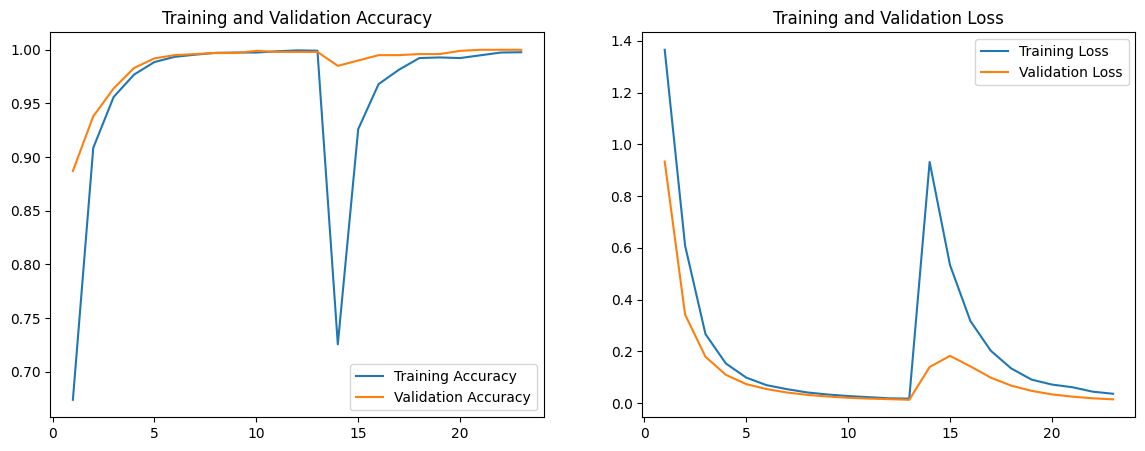

In [18]:
import matplotlib.pyplot as plt

def plot_training_history(histories, titles):
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for h in histories:
        acc += h.history['accuracy']
        val_acc += h.history['val_accuracy']
        loss += h.history['loss']
        val_loss += h.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Combineing histories
plot_training_history([history, fine_tune_history], ["Initial", "Fine-tuning"])


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


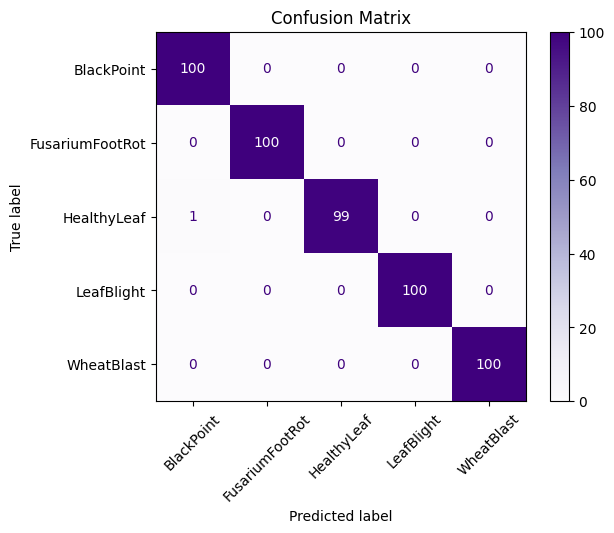

Classification Report:

                 precision    recall  f1-score   support

     BlackPoint       0.99      1.00      1.00       100
FusariumFootRot       1.00      1.00      1.00       100
    HealthyLeaf       1.00      0.99      0.99       100
     LeafBlight       1.00      1.00      1.00       100
     WheatBlast       1.00      1.00      1.00       100

       accuracy                           1.00       500
      macro avg       1.00      1.00      1.00       500
   weighted avg       1.00      1.00      1.00       500



In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

class_names = ['BlackPoint', 'FusariumFootRot', 'HealthyLeaf', 'LeafBlight', 'WheatBlast']

# getting true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# converting to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Purples, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


AUGMENTING THE TEST SET

In [20]:
test_ds_augmented = test_ds.map(lambda x, y: (tf.image.random_flip_left_right(x), y))


In [22]:
# loading best weights
model.load_weights(checkpoint_path)

# evaluating performance on augmented test set
loss_aug, acc_aug = model.evaluate(test_ds_augmented)
print(f"Augmented Test Accuracy: {acc_aug:.4f}")
print(f"Augmented Test Loss: {loss_aug:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 232 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9977 - loss: 0.0224
Augmented Test Accuracy: 0.9960
Augmented Test Loss: 0.0230


In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true_aug = []
y_pred_aug = []

for images, labels in test_ds_augmented:
    preds = model.predict(images)
    y_true_aug.extend(labels.numpy())
    y_pred_aug.extend(np.argmax(preds, axis=1))

# Report
print("Classification Report on Flipped Test Set:\n")
print(classification_report(y_true_aug, y_pred_aug, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
Classification Report on Flipped Test Set:

                 precision    recall  f1-score   support

     BlackPoint       0.98      1.00      0.99       100
FusariumFootRot       1.00      1.00      1.00       100
    HealthyLeaf       1.00      0.99      0.99       100
     LeafBlight       1.00      0.99      0.99       100
     WheatBlast       1.00      1.00      1.00       100

       accuracy                  

In [24]:
def stronger_augment(x, y):
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_brightness(x, max_delta=0.3)
    x = tf.image.random_contrast(x, lower=0.8, upper=1.2)
    x = tf.image.random_saturation(x, lower=0.8, upper=1.2)
    x = tf.image.central_crop(x, central_fraction=0.85)
    return x, y

test_ds_aug_strong = test_ds.map(stronger_augment)


In [25]:
# evaluating performance on stronger augmented test set
loss_aug_strong, acc_aug_strong = model.evaluate(test_ds_aug_strong)
print(f"Strongly Augmented Test Accuracy: {acc_aug_strong:.4f}")
print(f"Strongly Augmented Test Loss: {loss_aug_strong:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9952 - loss: 0.0429
Strongly Augmented Test Accuracy: 0.9940
Strongly Augmented Test Loss: 0.0398


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true_strong = []
y_pred_strong = []

for images, labels in test_ds_aug_strong:
    preds = model.predict(images)
    y_true_strong.extend(labels.numpy())
    y_pred_strong.extend(np.argmax(preds, axis=1))

class_names = ['BlackPoint', 'FusariumFootRot', 'HealthyLeaf', 'LeafBlight', 'WheatBlast']

# Classification Report
print("Classification Report on Strongly Augmented Test Set:\n")
print(classification_report(y_true_strong, y_pred_strong, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
Classification Report on Strongly Augmented Test Set:

                 precision    recall  f1-score   support

     BlackPoint       0.98      1.00      0.99       100
FusariumFootRot       1.00      1.00      1.00       100
    HealthyLeaf       1.00      0.99      0.99       100
     LeafBlight       1.00      0.99      0.99       100
     WheatBlast       1.00      1.00      1.00       100

       accura

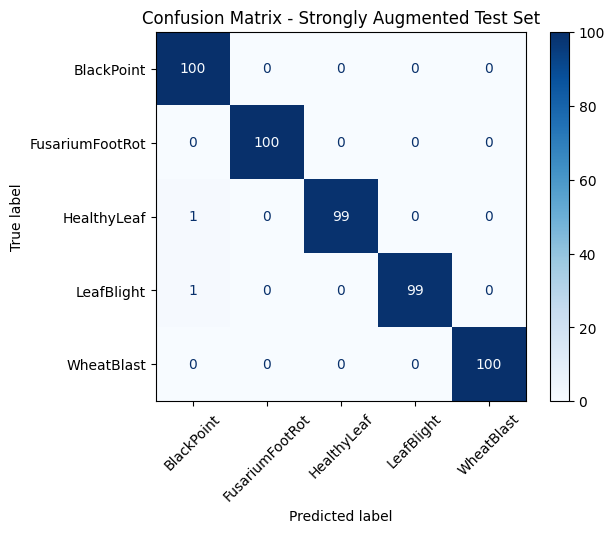

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Compute Confusion Matrix
cm_strong = confusion_matrix(y_true_strong, y_pred_strong)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_strong, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - Strongly Augmented Test Set")
plt.grid(False)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


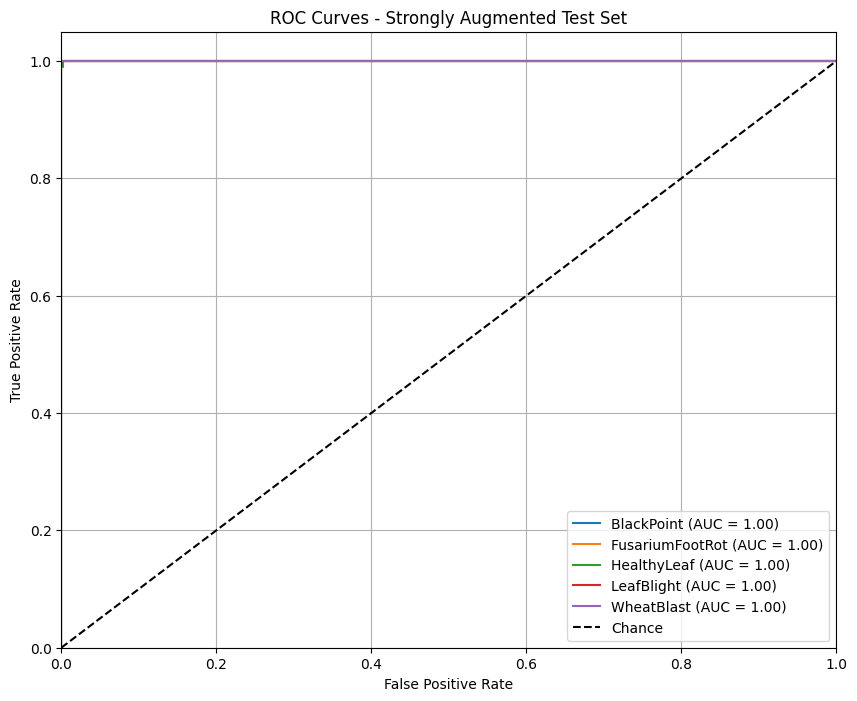

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# Number of classes
n_classes = len(class_names)

# One-hot encode true labels
y_true_strong_oh = label_binarize(y_true_strong, classes=range(n_classes))

# Predict probabilities instead of class labels
y_prob_strong = []

for images, _ in test_ds_aug_strong:
    preds = model.predict(images)
    y_prob_strong.extend(preds)

y_prob_strong = np.array(y_prob_strong)

# Plot ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_strong_oh[:, i], y_prob_strong[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Plot ROC for Random Guess
plt.plot([0, 1], [0, 1], 'k--', label="Chance", linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Strongly Augmented Test Set")
plt.legend(loc="lower right")
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

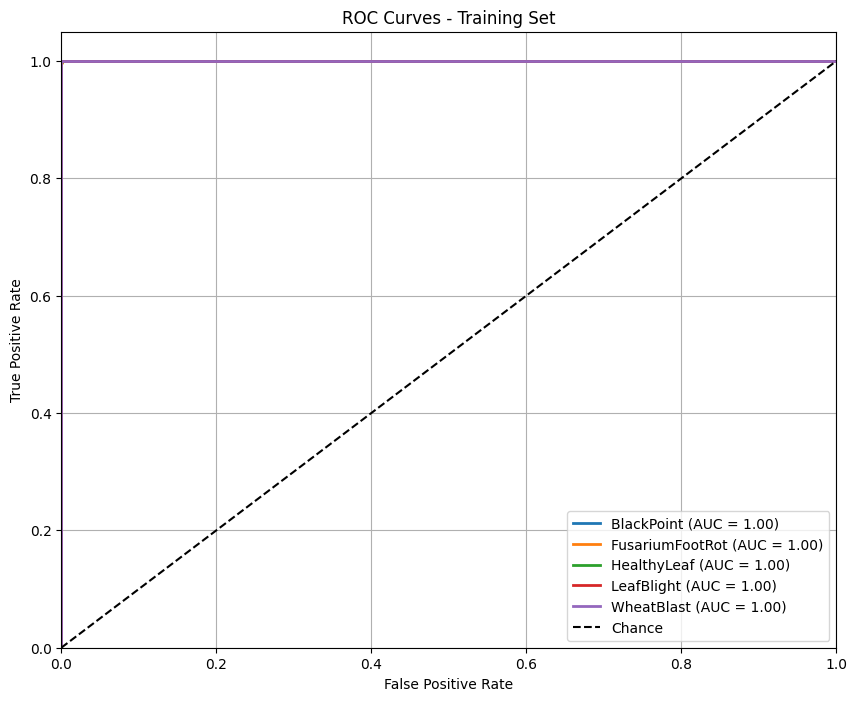

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get true labels and predicted probabilities
y_true_train = []
y_prob_train = []

for images, labels in train_ds:
    probs = model.predict(images)
    y_true_train.extend(labels.numpy())
    y_prob_train.extend(probs)

# Convert to NumPy arrays
y_true_train = np.array(y_true_train)
y_prob_train = np.array(y_prob_train)

# One-hot encode true labels
n_classes = len(class_names)
y_true_train_oh = label_binarize(y_true_train, classes=range(n_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_train_oh[:, i], y_prob_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Chance')

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Training Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
